In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

<AxesSubplot:>

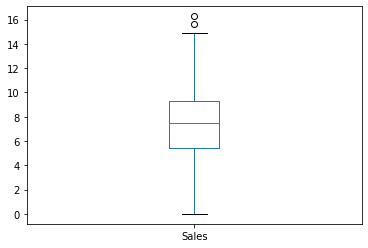

In [3]:
data['Sales'].plot(kind='box')

In [5]:
xy=[0,5,9,15,20]
categeory=['0 to 5','5 to 9','9 to 15','15 to 20']
data['Sales']=pd.cut(data['Sales'],xy,labels=categeory)
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0  9 to 15        138      73           11         276    120       Bad   42   
1  9 to 15        111      48           16         260     83      Good   65   
2  9 to 15        113      35           10         269     80    Medium   59   
3   5 to 9        117     100            4         466     97    Medium   55   
4   0 to 5        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Sales']=label_encoder.fit_transform(data['Sales'])
data.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      3        138      73           11         276    120          0   42   
1      3        111      48           16         260     83          1   65   
2      3        113      35           10         269     80          2   59   
3      2        117     100            4         466     97          2   55   
4      0        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [7]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [8]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [9]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

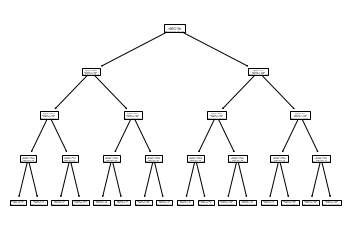

In [10]:
tree.plot_tree(model);

In [11]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

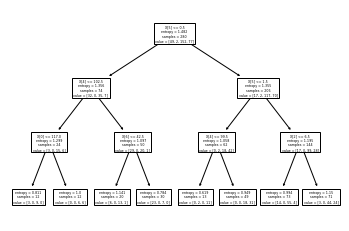

In [12]:
tree.plot_tree(model1);

In [14]:
cn=['0 to 5','5 to 9','9 to 15','15 to 20']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=3000)
tree.plot_tree(model1,class_names=cn,filled=True);

In [15]:
#training accuracy
preds_train=model1.predict(x_train)
np.mean(preds_train==y_train)


0.6857142857142857

In [16]:
preds=model1.predict(x_test)
np.mean(preds==y_test)

0.5416666666666666

# CART

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [18]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

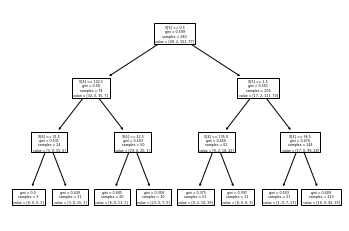

In [19]:
tree.plot_tree(model_gini);

In [20]:
cn=['0 to 5','5 to 9','9 to 15','15 to 20']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=3000)
tree.plot_tree(model_gini,class_names=cn,filled=True);

In [21]:
preds_train_gini=model_gini.predict(x_train)
np.mean(preds_train_gini==y_train)

0.7357142857142858

In [22]:
preds_gini=model_gini.predict(x_test)
np.mean(preds_gini==y_test)

0.5666666666666667